<a href="https://colab.research.google.com/github/PrajsPrabs/UpgradBACaseStudy/blob/main/EComm1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
import pandas as pd
import numpy as nm
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the Data

In [66]:
EleData = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/E-Commerce Capstone Dataset/ConsumerElectronics.csv")
ProdList = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/E-Commerce Capstone Dataset/Media data and other information.xlsx",header=1,sheet_name="Product List")
Investment = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/E-Commerce Capstone Dataset/Media data and other information.xlsx",header=2,sheet_name="Media Investment")
MonthlyNPS = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/E-Commerce Capstone Dataset/Media data and other information.xlsx",sheet_name="Monthly NPS Score")
SalesCal = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/E-Commerce Capstone Dataset/Media data and other information.xlsx",sheet_name="Special Sale Calendar")
Ont2015=pd.read_excel("/content/drive/MyDrive/Colab Notebooks/E-Commerce Capstone Dataset/ONTARIO-2015.xlsx",header=24)
Ont2016=pd.read_excel("/content/drive/MyDrive/Colab Notebooks/E-Commerce Capstone Dataset/ONTARIO-2016.xlsx",header=24)

<ipython-input-66-69dde8b565b3>:1: DtypeWarning: Columns (6,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  EleData = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/E-Commerce Capstone Dataset/ConsumerElectronics.csv")


In [67]:
##ProdList
ProdList.info()
ProdList=ProdList.rename(columns={"Unnamed: 1":"Equipment"})
ProdList.drop("Unnamed: 0",1,inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  0 non-null      float64
 1   Unnamed: 1  75 non-null     object 
 2   Frequency   75 non-null     int64  
 3   Percent     75 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 2.5+ KB


<ipython-input-67-16c6641230a8>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  ProdList.drop("Unnamed: 0",1,inplace=True)


In [68]:
##Investments
Investment.head()
Investment = Investment.drop("Unnamed: 0",1)

<ipython-input-68-ad6f8d046e0d>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  Investment = Investment.drop("Unnamed: 0",1)


In [69]:
Investment.head()

,Year,Month,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other
0,2015.0,7.0,17.061775,0.215330,2.533014,7.414270,0.000933,1.327278,0.547254,5.023697,NaN,NaN
1,2015.0,8.0,5.064306,0.006438,1.278074,1.063332,0.000006,0.129244,0.073684,2.513528,NaN,NaN
2,2015.0,9.0,96.254380,3.879504,1.356528,62.787651,0.610292,16.379990,5.038266,6.202149,NaN,NaN
3,2015.0,10.0,170.156297,6.144711,12.622480,84.672532,3.444075,24.371778,6.973711,31.927011,NaN,NaN
4,2015.0,11.0,51.216220,4.220630,1.275469,14.172116,0.168633,19.561574,6.595767,5.222032,NaN,NaN


In [70]:
#SalesCal
SalesCal.head(10)

,Unnamed: 0,Unnamed: 1,Sales Calendar
0,NaN,2015.0,(18-19th July)
1,NaN,NaN,(15-17th Aug)
2,NaN,NaN,(28-30th Aug)
3,NaN,NaN,(15-17th Oct)
4,NaN,NaN,(7-14th Nov)
5,NaN,NaN,(25th Dec'15 - 3rd Jan'16)
6,NaN,2016.0,(20-22 Jan)
7,NaN,NaN,(1-2 Feb)
8,NaN,NaN,(20-21 Feb)
9,NaN,NaN,(14-15 Feb)


In [71]:
SalesCal=SalesCal.drop("Unnamed: 0",1)
SalesCal.rename(columns={"Unnamed: 1":"Year"},inplace=True)

<ipython-input-71-3ef3e6c831f7>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  SalesCal=SalesCal.drop("Unnamed: 0",1)


In [72]:
SalesCal.iloc[0:6,0:1]='2015'
SalesCal.iloc[6:11,0:1]='2016'

In [73]:
SalesCal

,Year,Sales Calendar
0,2015,(18-19th July)
1,2015,(15-17th Aug)
2,2015,(28-30th Aug)
3,2015,(15-17th Oct)
4,2015,(7-14th Nov)
5,2015,(25th Dec'15 - 3rd Jan'16)
6,2016,(20-22 Jan)
7,2016,(1-2 Feb)
8,2016,(20-21 Feb)
9,2016,(14-15 Feb)


In [74]:
MonthlyNPS.rename(columns={"Unnamed: 0":"Header"},inplace=True)

# Data Cleaning



 Basic data type handling

In [75]:
EleData = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/E-Commerce Capstone Dataset/ConsumerElectronics.csv")

<ipython-input-75-de44342a677d>:1: DtypeWarning: Columns (6,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  EleData = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/E-Commerce Capstone Dataset/ConsumerElectronics.csv")


In [76]:
EleData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1648824 entries, 0 to 1648823
Data columns (total 20 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   fsn_id                           1648824 non-null  object 
 1   order_date                       1648824 non-null  object 
 2   Year                             1648824 non-null  int64  
 3   Month                            1648824 non-null  int64  
 4   order_id                         1648824 non-null  float64
 5   order_item_id                    1648824 non-null  float64
 6   gmv                              1648824 non-null  object 
 7   units                            1648824 non-null  int64  
 8   deliverybdays                    1648824 non-null  object 
 9   deliverycdays                    1648824 non-null  object 
 10  s1_fact.order_payment_type       1648824 non-null  object 
 11  sla                              1648824 non-null 

In [77]:
EleData.info()
# EleData.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1648824 entries, 0 to 1648823
Data columns (total 20 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   fsn_id                           1648824 non-null  object 
 1   order_date                       1648824 non-null  object 
 2   Year                             1648824 non-null  int64  
 3   Month                            1648824 non-null  int64  
 4   order_id                         1648824 non-null  float64
 5   order_item_id                    1648824 non-null  float64
 6   gmv                              1648824 non-null  object 
 7   units                            1648824 non-null  int64  
 8   deliverybdays                    1648824 non-null  object 
 9   deliverycdays                    1648824 non-null  object 
 10  s1_fact.order_payment_type       1648824 non-null  object 
 11  sla                              1648824 non-null 

In [78]:
# EleData.order_date.describe()
EleData["order_date"]= pd.to_datetime(EleData.order_date).dt.date


In [79]:
EleData.Year.value_counts()
EleData.Month.value_counts()

9     209202
10    207301
12    158151
5     157072
3     153299
2     144084
1     143768
4     134390
11    130203
6     121798
7      89285
8        271
Name: Month, dtype: int64

In [80]:
EleData.order_id=EleData.order_id.astype(int)
EleData.order_item_id=EleData.order_item_id.astype(int)

In [81]:
## removing duplicate order items records
EleData= EleData.drop_duplicates(subset=["order_id","order_item_id"],keep='first')

In [82]:
# EleData.info()
Ele_obj_columns=[]
for i in EleData.columns:
  if EleData[i].dtype=='object':
    Ele_obj_columns.append(i)

In [83]:
## removing duplicates using strip and lower
Ele_obj_columns
EleData[Ele_obj_columns]=EleData[Ele_obj_columns].apply(lambda x : x.astype(str).str.strip())
EleData[Ele_obj_columns]=EleData[Ele_obj_columns].apply(lambda x : x.astype(str).str.lower())

In [84]:
EleData= EleData.drop_duplicates(keep='first')
EleData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1508710 entries, 0 to 1543996
Data columns (total 20 columns):
 #   Column                           Non-Null Count    Dtype 
---  ------                           --------------    ----- 
 0   fsn_id                           1508710 non-null  object
 1   order_date                       1508710 non-null  object
 2   Year                             1508710 non-null  int64 
 3   Month                            1508710 non-null  int64 
 4   order_id                         1508710 non-null  int64 
 5   order_item_id                    1508710 non-null  int64 
 6   gmv                              1508710 non-null  object
 7   units                            1508710 non-null  int64 
 8   deliverybdays                    1508710 non-null  object
 9   deliverycdays                    1508710 non-null  object
 10  s1_fact.order_payment_type       1508710 non-null  object
 11  sla                              1508710 non-null  int64 
 12  

In [85]:
EleData.units.value_counts()

1     1488142
2       16585
3        2010
4         786
5         669
6         166
10        159
8          63
7          43
9          26
15         12
12         10
20          8
16          6
11          6
18          4
14          3
21          2
17          2
50          2
13          2
29          1
39          1
30          1
34          1
Name: units, dtype: int64

In [86]:
# EleData[EleData.gmv=='']
EleData.loc[EleData.gmv=='',"gmv"]=EleData.units*EleData.product_mrp

In [87]:
EleData[EleData.deliverybdays=='\\N']
EleData.deliverybdays.replace('\\N','NA',inplace=True)
EleData.info()
EleData[EleData.deliverycdays=='\\N']
EleData.deliverycdays.replace('\\N','NA',inplace=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1508710 entries, 0 to 1543996
Data columns (total 20 columns):
 #   Column                           Non-Null Count    Dtype 
---  ------                           --------------    ----- 
 0   fsn_id                           1508710 non-null  object
 1   order_date                       1508710 non-null  object
 2   Year                             1508710 non-null  int64 
 3   Month                            1508710 non-null  int64 
 4   order_id                         1508710 non-null  int64 
 5   order_item_id                    1508710 non-null  int64 
 6   gmv                              1508710 non-null  object
 7   units                            1508710 non-null  int64 
 8   deliverybdays                    1508710 non-null  object
 9   deliverycdays                    1508710 non-null  object
 10  s1_fact.order_payment_type       1508710 non-null  object
 11  sla                              1508710 non-null  int64 
 12  

In [88]:
EleData.deliverybdays.value_counts()[0]/EleData.shape[0]
# --78% values are NA so dropping this column
EleData.deliverycdays.value_counts()[0]/EleData.shape[0]
# --78% values are NA so dropping this column

EleData.drop(["deliverybdays","deliverycdays"],1,inplace=True)


<ipython-input-88-94372c1098ca>:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  EleData.drop(["deliverybdays","deliverycdays"],1,inplace=True)


In [89]:
EleData["s1_fact.order_payment_type"].value_counts()
EleData.rename(columns={"s1_fact.order_payment_type":"order_payment_type"},inplace=True)

In [90]:
EleData.order_payment_type.value_counts()

cod        1090984
prepaid     417726
Name: order_payment_type, dtype: int64

In [91]:
EleData.sla=EleData.sla.astype(int)
EleData[EleData.sla==0].shape

(5585, 18)

In [92]:
EleData.pincode.value_counts()
## Too many groups , plus format isnt correct plus canadas pincode are alphanumeric so dropping it

EleData.drop(["pincode"],1,inplace=True)

<ipython-input-92-729901627f6a>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  EleData.drop(["pincode"],1,inplace=True)


In [93]:
print(EleData.product_analytic_category.value_counts())
print(EleData.product_analytic_sub_category.value_counts())
print(EleData.product_analytic_vertical.value_counts())
##droppning supercategory as its having only 1 value
EleData.drop(['product_analytic_super_category'],1,inplace=True)

entertainmentsmall    871879
cameraaccessory       230278
gaminghardware        211680
gamecddvd             100205
camera                 94668
Name: product_analytic_category, dtype: int64
speaker                504320
cameraaccessory        214084
gamingaccessory        185297
tvvideosmall           131631
homeaudio              114802
audiomp3player         103192
game                   100120
camera                  94668
gamingconsole           26383
camerastorage           16194
audioaccessory          10327
hometheatre              4177
amplifierreceiver        3430
gamemembershipcards        85
Name: product_analytic_sub_category, dtype: int64
laptopspeaker        263718
mobilespeaker        234867
audiomp3player       103192
physicalgame          91879
homeaudiospeaker      79766
                      ...  
reflectorumbrella         3
flashshoeadapter          2
karaokeplayer             2
gamecontrolmount          1
teleconverter             1
Name: product_analytic_vertical

<ipython-input-93-b37bb17a7256>:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  EleData.drop(['product_analytic_super_category'],1,inplace=True)


In [94]:
## new subcategory needs to be created
## Camera , Home Audio and Gaming Accessory
EleData_1=EleData[EleData.product_analytic_sub_category.isin(['camera','homeaudio','gamingaccessory'])]

In [95]:
EleData_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394767 entries, 1598 to 1542378
Data columns (total 16 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   fsn_id                         394767 non-null  object
 1   order_date                     394767 non-null  object
 2   Year                           394767 non-null  int64 
 3   Month                          394767 non-null  int64 
 4   order_id                       394767 non-null  int64 
 5   order_item_id                  394767 non-null  int64 
 6   gmv                            394767 non-null  object
 7   units                          394767 non-null  int64 
 8   order_payment_type             394767 non-null  object
 9   sla                            394767 non-null  int64 
 10  cust_id                        394767 non-null  object
 11  product_analytic_category      394767 non-null  object
 12  product_analytic_sub_category  394767 no

In [96]:
EleData_1.product_analytic_category.value_counts()
EleData_1.product_analytic_vertical.value_counts()



homeaudiospeaker         79766
gamingheadset            59649
dslr                     54087
gamepad                  52884
point & shoot            35116
gamingmouse              34774
fmradio                  25299
gamingaccessorykit        7631
tvoutcableaccessory       6646
gamingkeyboard            6231
gamingmemorycard          5944
gamingmousepad            4192
voicerecorder             3384
gamingadapter             3045
joystickgamingwheel       2671
boombox                   2456
instant cameras           2404
sportsandaction           2161
dock                      1888
hifisystem                1393
motioncontroller          1044
camcorders                 900
gamingspeaker              493
dockingstation             355
djcontroller               188
soundmixer                  68
coolingpad                  45
gamingchargingstation       43
gaminggun                    4
slingbox                     3
karaokeplayer                2
gamecontrolmount             1
Name: pr

In [97]:
vertical1=(EleData_1.product_analytic_vertical.value_counts()<20000)[EleData_1.product_analytic_vertical.value_counts()<20000].index
EleData_1.product_analytic_vertical.value_counts()<20000

homeaudiospeaker         False
gamingheadset            False
dslr                     False
gamepad                  False
point & shoot            False
gamingmouse              False
fmradio                  False
gamingaccessorykit        True
tvoutcableaccessory       True
gamingkeyboard            True
gamingmemorycard          True
gamingmousepad            True
voicerecorder             True
gamingadapter             True
joystickgamingwheel       True
boombox                   True
instant cameras           True
sportsandaction           True
dock                      True
hifisystem                True
motioncontroller          True
camcorders                True
gamingspeaker             True
dockingstation            True
djcontroller              True
soundmixer                True
coolingpad                True
gamingchargingstation     True
gaminggun                 True
slingbox                  True
karaokeplayer             True
gamecontrolmount          True
Name: pr

In [98]:
EleData_1["product_analytic_vertical_derived"]=EleData_1.product_analytic_vertical.replace(vertical1,"Others")

<ipython-input-98-9b64ecd5eb04>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EleData_1["product_analytic_vertical_derived"]=EleData_1.product_analytic_vertical.replace(vertical1,"Others")


In [99]:
EleData_1.product_analytic_vertical_derived.value_counts()

homeaudiospeaker    79766
gamingheadset       59649
dslr                54087
Others              53192
gamepad             52884
point & shoot       35116
gamingmouse         34774
fmradio             25299
Name: product_analytic_vertical_derived, dtype: int64

In [100]:
EleData_1.product_mrp.astype(float)

1598        3999.0
1599        3999.0
1600        3999.0
1601        3999.0
1602        3999.0
            ...   
1542374    10500.0
1542375    10500.0
1542376    10500.0
1542377    10500.0
1542378    10500.0
Name: product_mrp, Length: 394767, dtype: float64

Outlier treatment and Feature Engineering

In [101]:
EleData_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394767 entries, 1598 to 1542378
Data columns (total 17 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   fsn_id                             394767 non-null  object
 1   order_date                         394767 non-null  object
 2   Year                               394767 non-null  int64 
 3   Month                              394767 non-null  int64 
 4   order_id                           394767 non-null  int64 
 5   order_item_id                      394767 non-null  int64 
 6   gmv                                394767 non-null  object
 7   units                              394767 non-null  int64 
 8   order_payment_type                 394767 non-null  object
 9   sla                                394767 non-null  int64 
 10  cust_id                            394767 non-null  object
 11  product_analytic_category          394767 non-nu

In [102]:
EleData_1.Year=EleData_1.Year.astype(object)
EleData_1.Month=EleData_1.Month.astype(object)

<ipython-input-102-4d925445d5e8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EleData_1.Year=EleData_1.Year.astype(object)
<ipython-input-102-4d925445d5e8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EleData_1.Month=EleData_1.Month.astype(object)


In [103]:
## Deleting columns which wont be required
EleData2=EleData_1.drop(['fsn_id','cust_id','product_analytic_vertical','order_id'],1)
## keep only July 2015 to June 2016 data

EleData2=EleData2.where((EleData2['order_date']>='2015-07-01') & (EleData2['order_date']<='2016-06-30'))

<ipython-input-103-bc527e03aa0a>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  EleData2=EleData_1.drop(['fsn_id','cust_id','product_analytic_vertical','order_id'],1)


In [104]:
EleData2['gmv']=EleData2['gmv'].astype(float)

In [105]:
EleData2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394767 entries, 1598 to 1542378
Data columns (total 13 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   order_date                         394612 non-null  object 
 1   Year                               394612 non-null  object 
 2   Month                              394612 non-null  object 
 3   order_item_id                      394612 non-null  float64
 4   gmv                                394612 non-null  float64
 5   units                              394612 non-null  float64
 6   order_payment_type                 394612 non-null  object 
 7   sla                                394612 non-null  float64
 8   product_analytic_category          394612 non-null  object 
 9   product_analytic_sub_category      394612 non-null  object 
 10  product_mrp                        394612 non-null  float64
 11  product_procurement_sla            

In [106]:
## integer column handling
num=[]
obj=[]
for i in EleData2.columns:
  if EleData2[i].dtype=='float64':
    num.append(i)
  if EleData2[i].dtype=='object':
    obj.append(i)

# num.remove('Year')
# num.remove('Month')
num.remove('order_item_id')


In [107]:
import matplotlib.pyplot as plt
num

['gmv', 'units', 'sla', 'product_mrp', 'product_procurement_sla']

In [108]:
EleData2[num].describe()


,gmv,units,sla,product_mrp,product_procurement_sla
count,394612.000000,394612.000000,394612.000000,394612.000000,394612.000000
mean,5284.090069,1.020782,5.460893,8464.834744,2.574747
std,9095.075021,0.211504,2.659377,13884.502714,1.955616
min,0.000000,1.000000,0.000000,0.000000,-1.000000
25%,449.000000,1.000000,4.000000,950.000000,1.000000
50%,1440.000000,1.000000,5.000000,2180.000000,2.000000
75%,3999.000000,1.000000,7.000000,6990.000000,3.000000
max,226947.000000,18.000000,60.000000,280000.000000,15.000000


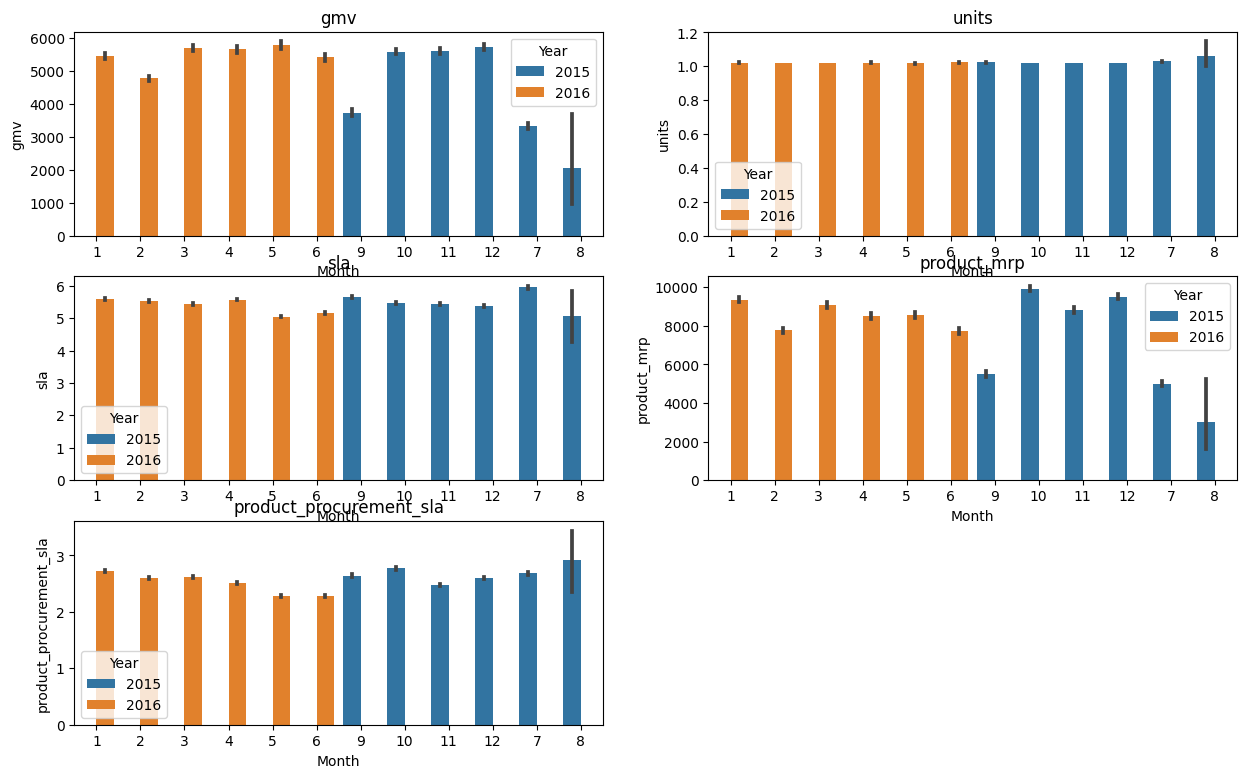

In [109]:
plt.figure(figsize=(15, 9))
x=1
for i in num:
  plt.subplot(3,2,x)
  plt.title(i)
  sns.barplot(x=EleData2['Month'],y=EleData2[i],hue=EleData2['Year'])
  x=x+1

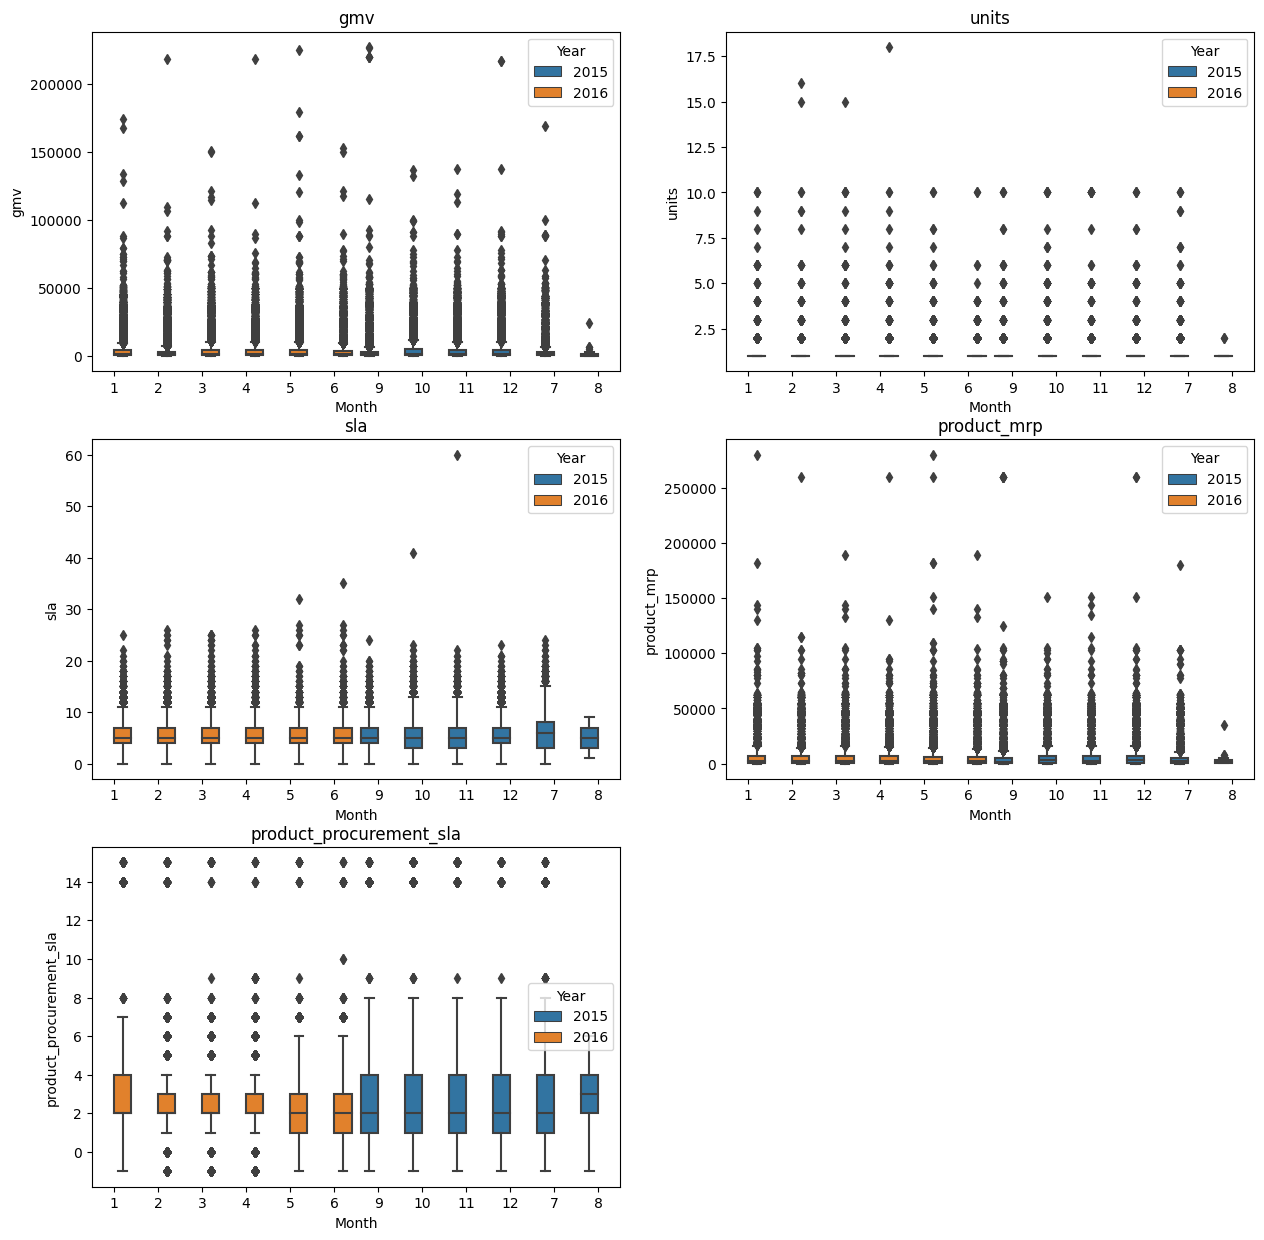

In [110]:
plt.figure(figsize=(15, 15))
x=1
for i in num:
  plt.subplot(3,2,x)
  plt.title(i)
  sns.boxplot(x=EleData2['Month'],y=EleData2[i],hue=EleData2['Year'])
  x=x+1

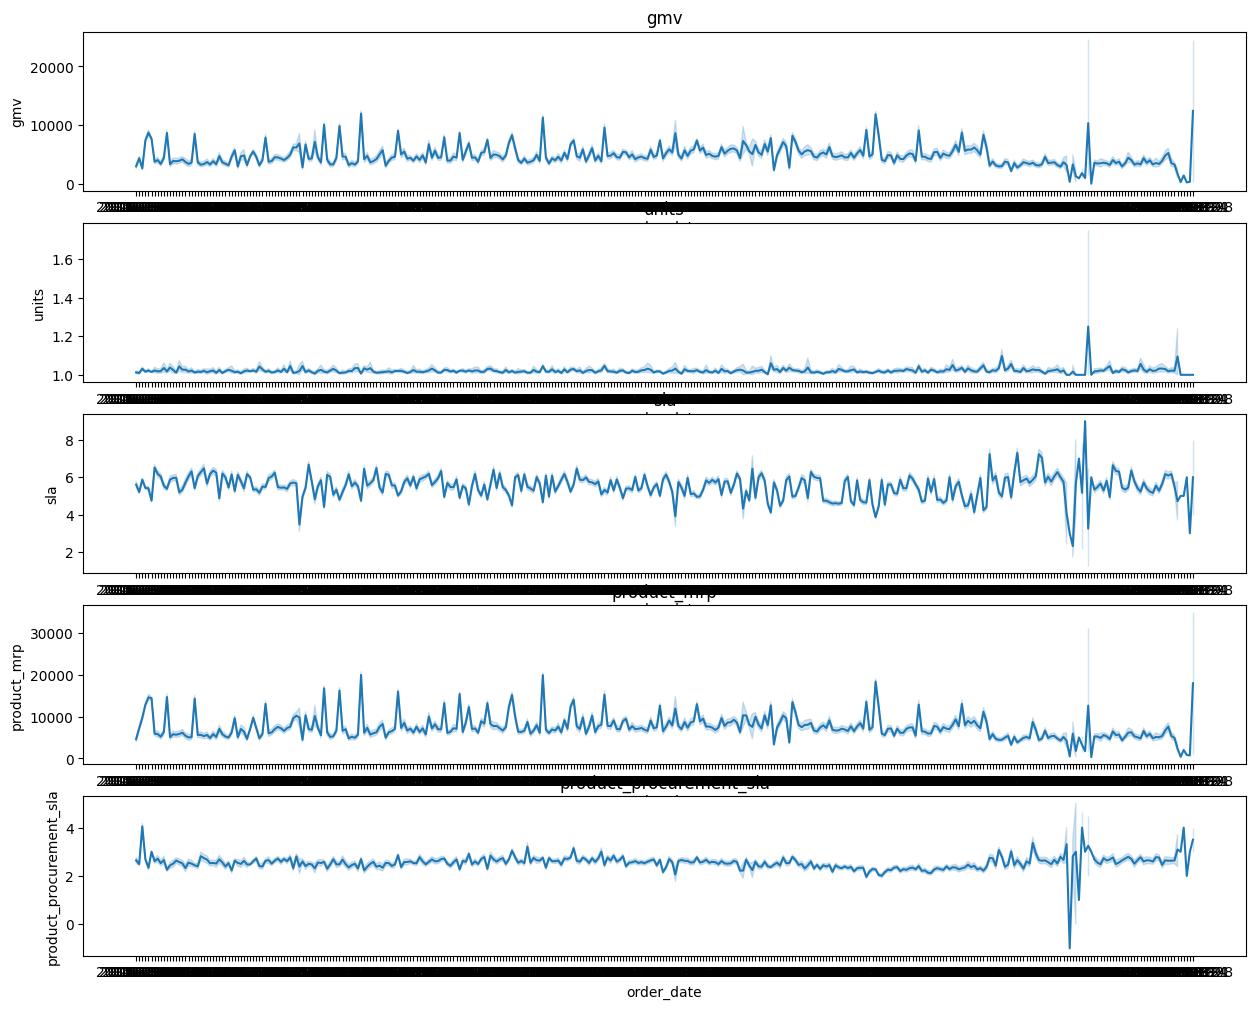

In [111]:
plt.figure(figsize=(15, 12))
x=1
for i in num:
  plt.subplot(5,1,x)
  plt.title(i)
  sns.lineplot(x=EleData2['order_date'],y=EleData2[i])
  x=x+1

In [112]:
for i in num:
  q1=EleData2[i].quantile(0.25)
  q3=EleData2[i].quantile(0.75)
  iqr=q3-q1
  lw=iqr-q1*1.5
  up=iqr+q3*1.5
  print(i,lw,up)
  EleData2.loc[EleData2[i]<lw,i]=lw
  EleData2.loc[EleData2[i]>up,i]=up

gmv 2876.5 9548.5
units -1.5 1.5
sla -3.0 13.5
product_mrp 4615.0 16525.0
product_procurement_sla 0.5 6.5


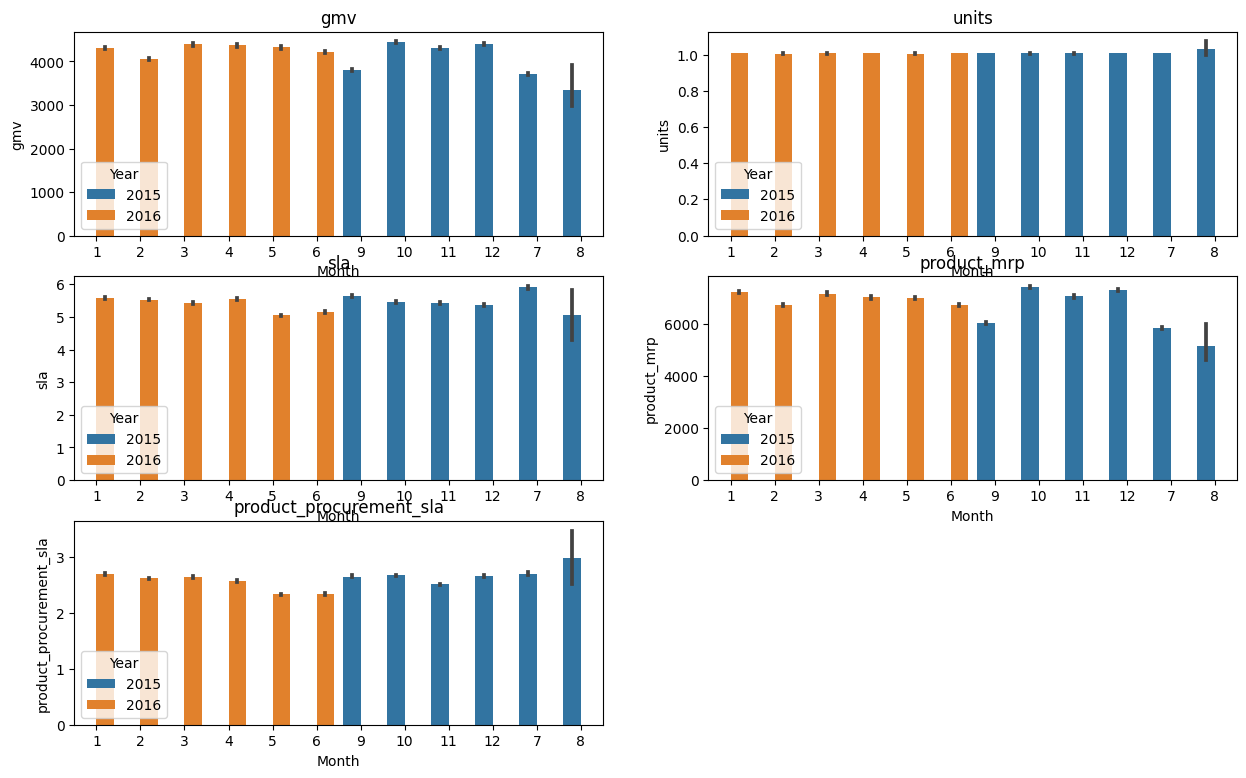

In [113]:
plt.figure(figsize=(15, 9))
x=1
for i in num:
  plt.subplot(3,2,x)
  plt.title(i)
  sns.barplot(x=EleData2['Month'],y=EleData2[i],hue=EleData2['Year'])
  x=x+1

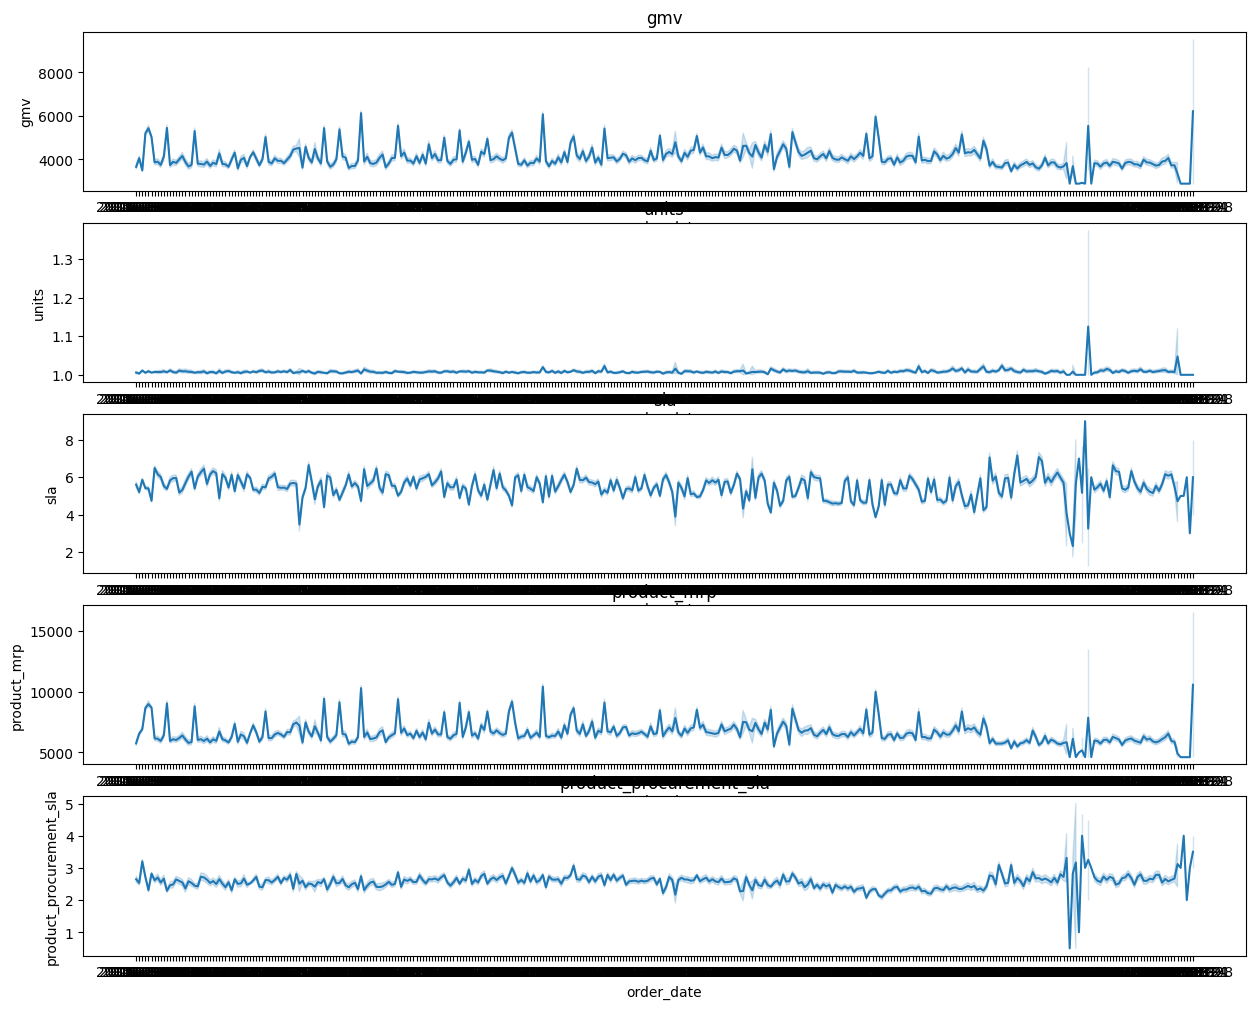

In [114]:
plt.figure(figsize=(15, 12))
x=1
for i in num:
  plt.subplot(5,1,x)
  plt.title(i)
  sns.lineplot(x=EleData2['order_date'],y=EleData2[i])
  x=x+1

In [115]:
obj.remove('order_date')
obj.remove('Year')
obj.remove('Month')

In [116]:
obj

['order_payment_type',
 'product_analytic_category',
 'product_analytic_sub_category',
 'product_analytic_vertical_derived']

Data Analysis and feature extraction

In [148]:
EleData2.info()
EleData2['order_date']=pd.to_datetime(EleData2['order_date']).dt.date

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394767 entries, 1598 to 1542378
Data columns (total 14 columns):
 #   Column                             Non-Null Count   Dtype          
---  ------                             --------------   -----          
 0   order_date                         394612 non-null  object         
 1   Year                               394612 non-null  object         
 2   Month                              394612 non-null  object         
 3   order_item_id                      394612 non-null  float64        
 4   gmv                                394612 non-null  float64        
 5   units                              394612 non-null  float64        
 6   order_payment_type                 394612 non-null  object         
 7   sla                                394612 non-null  float64        
 8   product_analytic_category          394612 non-null  object         
 9   product_analytic_sub_category      394612 non-null  object         
 10  prod

In [152]:
# (pd.to_datetime(EleData2['order_date'])-pd.to_datetime('2015-07-01'))/7
EleData2['week']=((pd.to_datetime(EleData2['order_date'])-pd.to_datetime('2015-07-01'))/7)
EleData2['week']=EleData2['week'].apply(lambda x: x.days+1)
EleData2.loc[:,['order_date','week']]
EleData2.week.value_counts()

16.0    28486
44.0    13901
19.0    13257
30.0    12423
36.0    12171
25.0    12118
34.0    12032
48.0    10970
26.0     9725
32.0     9455
37.0     9402
23.0     9354
28.0     8977
35.0     8958
24.0     8529
27.0     8434
31.0     8218
33.0     8190
46.0     8126
17.0     8021
18.0     7975
47.0     7663
29.0     7549
22.0     7427
45.0     7383
49.0     7324
40.0     7124
41.0     7067
38.0     7067
50.0     6927
39.0     6772
20.0     6593
3.0      6495
51.0     6483
2.0      6262
15.0     6253
10.0     6214
52.0     6164
13.0     6148
21.0     5936
4.0      5754
12.0     5597
11.0     5585
14.0     5537
42.0     5254
5.0      2558
43.0     2512
53.0     1714
1.0      1600
9.0       921
6.0         4
8.0         2
7.0         1
Name: week, dtype: int64

In [158]:
# 2. Discounts
EleData2['discount_per']=(((EleData2['product_mrp']-EleData2['gmv'])/EleData2['product_mrp'])*100).round(0)
EleData2.discount_per

1598       33.0
1599       38.0
1600       37.0
1601       38.0
1602       38.0
           ... 
1542374    50.0
1542375    50.0
1542376    59.0
1542377    56.0
1542378    49.0
Name: discount_per, Length: 394767, dtype: float64

In [163]:
# ProdList
# Investment
# MonthlyNPS
# SalesCal
# Ont2015
# Ont2016

EleData2.product_analytic_sub_category.value_counts()

gamingaccessory    185224
homeaudio          114763
camera              94625
Name: product_analytic_sub_category, dtype: int64

In [218]:
SalesCal.head(20)

SalesCal1=pd.DataFrame(['2015-07-18','2015-07-19','2015-08-15','2015-08-16','2015-08-17','2015-08-28','2015-08-29','2015-08-30',
                        '2015-10-15','2015-10-16','2015-10-17','2015-11-07','2015-11-08','2015-11-09','2015-11-10','2015-11-11','2015-11-12',
                        '2015-11-13','2015-11-14','2015-12-25','2015-12-26','2015-12-27','2015-12-28','2015-12-29','2015-12-30','2015-12-31',
                        '2016-01-01','2016-01-02','2016-01-03','2016-01-20','2016-01-21','2016-01-22','2016-02-01','2016-02-02','2016-02-20','2016-02-21',
                       '2016-02-14','2016-02-15','2016-03-07','2016-03-08','2016-03-09','2016-05-25','2016-05-26','2016-05-27'])

SalesCal1=SalesCal1[0].to_list()

In [233]:
EleData2['sale']=0
EleData2.loc[EleData.order_date.isin(SalesCal1),'sale']=1
EleData2.loc[EleData2.sale==1]

,order_date,Year,Month,order_item_id,gmv,units,order_payment_type,sla,product_analytic_category,product_analytic_sub_category,product_mrp,product_procurement_sla,product_analytic_vertical_derived,week,discount_per,sale
1600,2015-10-15,2015,10,1.417669e+15,2899.0,1.0,prepaid,5.0,gaminghardware,gamingaccessory,4615.0,5.0,gamepad,16.0,37.0,1
1601,2015-10-17,2015,10,1.419415e+15,2876.5,1.0,prepaid,5.0,gaminghardware,gamingaccessory,4615.0,5.0,gamepad,16.0,38.0,1
1603,2015-10-16,2015,10,4.417730e+15,2876.5,1.0,prepaid,7.0,gaminghardware,gamingaccessory,4615.0,5.0,gamepad,16.0,38.0,1
1608,2015-10-16,2015,10,3.418253e+15,2899.0,1.0,cod,5.0,gaminghardware,gamingaccessory,4615.0,5.0,gamepad,16.0,37.0,1
1614,2015-10-15,2015,10,1.417435e+15,2899.0,1.0,prepaid,5.0,gaminghardware,gamingaccessory,4615.0,5.0,gamepad,16.0,37.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1437932,2015-07-18,2015,7,2.188319e+08,9548.5,1.5,cod,10.0,entertainmentsmall,homeaudio,10500.0,5.0,Others,3.0,9.0,1
1446215,2015-08-29,2015,8,3.391016e+15,2876.5,1.0,cod,5.0,gaminghardware,gamingaccessory,4615.0,3.0,gamepad,9.0,38.0,1
1467403,2015-08-30,2015,8,3.000373e+17,2876.5,1.0,cod,5.0,gaminghardware,gamingaccessory,4615.0,4.0,gamepad,9.0,38.0,1
1499297,2015-08-28,2015,8,3.381470e+15,2876.5,1.0,cod,8.0,gaminghardware,gamingaccessory,4615.0,4.0,gamingheadset,9.0,38.0,1


<Axes: xlabel='week', ylabel='gmv'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


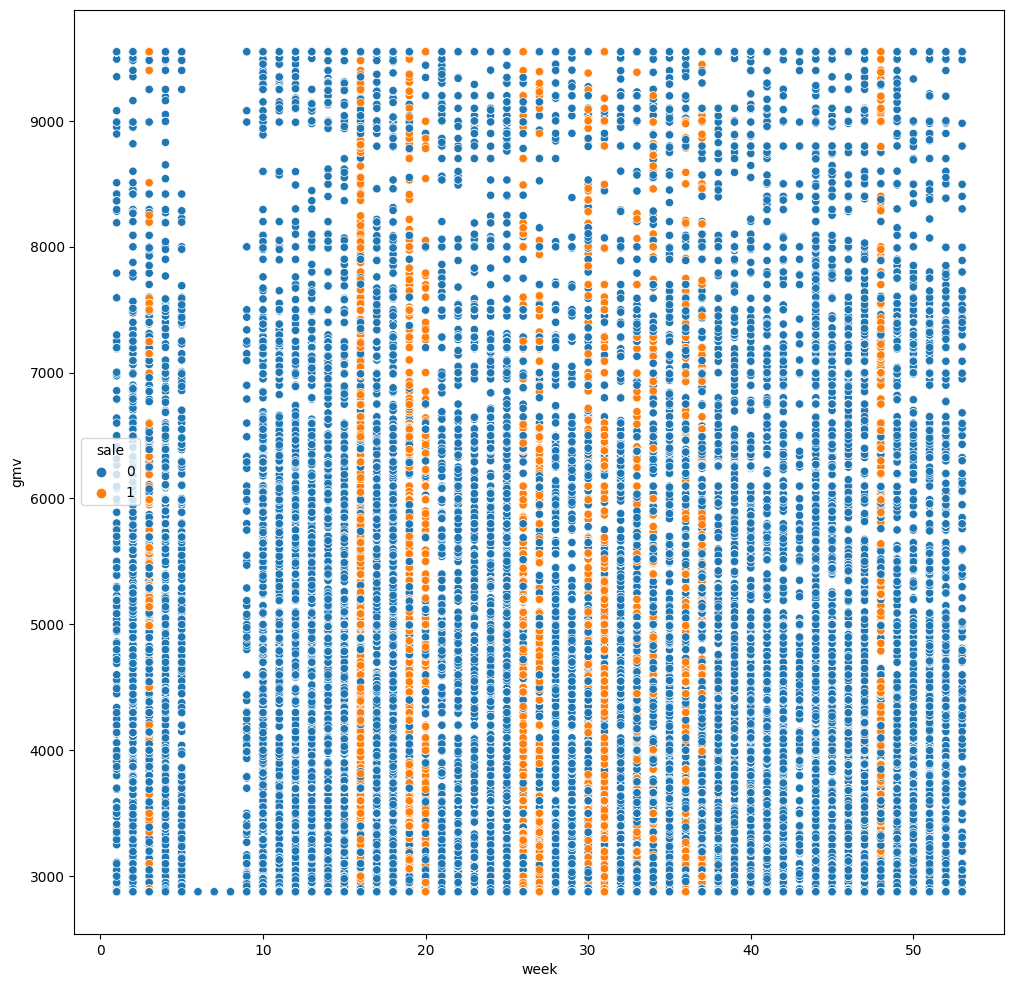

In [244]:
EleData2.info()
EleData2['week']=EleData2['week'].astype('object')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394767 entries, 1598 to 1542378
Data columns (total 16 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   order_date                         394612 non-null  object 
 1   Year                               394612 non-null  object 
 2   Month                              394612 non-null  object 
 3   order_item_id                      394612 non-null  float64
 4   gmv                                394612 non-null  float64
 5   units                              394612 non-null  float64
 6   order_payment_type                 394612 non-null  object 
 7   sla                                394612 non-null  float64
 8   product_analytic_category          394612 non-null  object 
 9   product_analytic_sub_category      394612 non-null  object 
 10  product_mrp                        394612 non-null  float64
 11  product_procurement_sla            